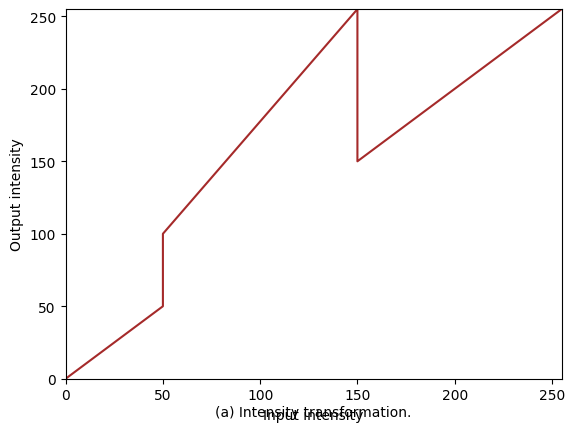

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Define the control points for the transformation
control_points = np.array([(0, 0), (50, 50), (50, 100), (150, 255), (150, 150), (255, 255)])

# Extract x and y coordinates from the control points
x = control_points[:, 0]
y = control_points[:, 1]

# Plot the transformation curve
fig, ax = plt.subplots()
ax.plot(x, y, color='brown')  # Brown color as shown in the image

# Set axis labels
ax.set_xlabel('Input intensity')
ax.set_ylabel('Output intensity')

# Set axis limits
ax.set_xlim(0, 255)
ax.set_ylim(0, 255)

# Add title or caption (optional)
ax.text(0.5, -0.1, "(a) Intensity transformation.", ha='center', transform=ax.transAxes)

# Show the plot
plt.show()


Transform length: 256


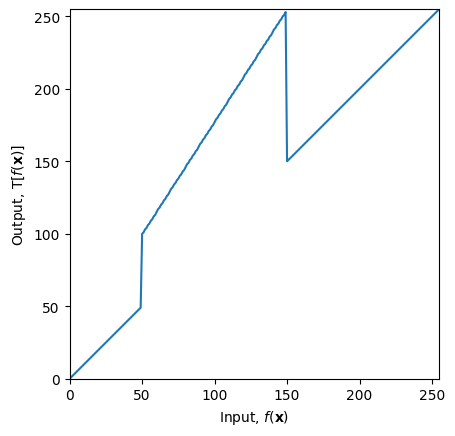

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Define the control points
c = np.array([(50, 50), (50, 100), (150, 255), (150, 150), (255, 255)])

# Define the intensity ranges based on control points
t1 = np.linspace(0, c[0, 1], c[0, 0] + 1).astype('uint8')      # From 0 to 50
t2 = np.linspace(c[0, 1], c[1, 1], c[1, 0] - c[0, 0] + 1).astype('uint8')  # From 50 to 100
t3 = np.linspace(c[1, 1], c[2, 1], c[2, 0] - c[1, 0] + 1).astype('uint8')  # From 100 to 150
t4 = np.linspace(c[2, 1], c[3, 1], c[3, 0] - c[2, 0] + 1).astype('uint8')  # From 150 to 200
t5 = np.linspace(c[3, 1], c[4, 1], c[4, 0] - c[3, 0] + 1).astype('uint8')  # From 200 to 255

# Concatenate the transformation arrays
transform = np.concatenate((t1[:-1], t2[:-1], t3[:-1], t4[:-1], t5), axis=0)
print(f'Transform length: {len(transform)}')

# Plot the transformation curve
fig, ax = plt.subplots()
ax.plot(transform)
ax.set_xlabel(r'Input, $f(\mathbf{x})$')  # Use raw string literals for LaTeX-style math
ax.set_ylabel(r'Output, $\mathrm{T}[f(\mathbf{x})]$')  # Correct the backslashes
ax.set_xlim(0, 255)
ax.set_ylim(0, 255)
ax.set_aspect('equal')
plt.show()

# Load the original image
img_orig = cv.imread('a1images/emma.jpg', cv.IMREAD_GRAYSCALE)

cv.imshow("Original Image", img_orig)
cv.waitKey(0)

# Apply intensity windowing transformation
image_transformed = cv.LUT(img_orig, transform)

# Show transformed image
cv.imshow("Transformed Image", image_transformed)
cv.waitKey(0)
cv.destroyAllWindows()

Transform length: 256


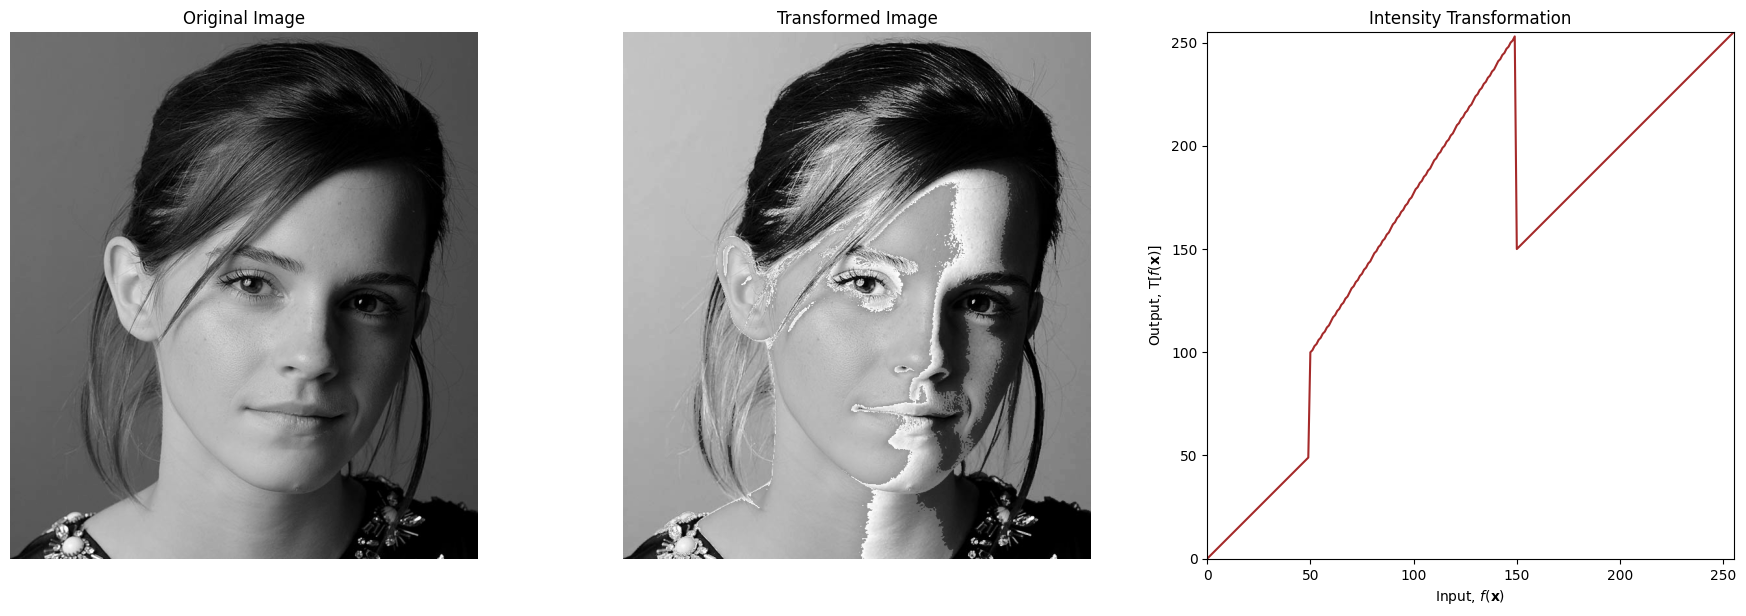

In [3]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Define the control points
c = np.array([(50, 50), (50, 100), (150, 255), (150, 150), (255, 255)])

# Define the intensity ranges based on control points
t1 = np.linspace(0, c[0, 1], c[0, 0] + 1).astype('uint8')      # From 0 to 50
t2 = np.linspace(c[0, 1], c[1, 1], c[1, 0] - c[0, 0] + 1).astype('uint8')  # From 50 to 100
t3 = np.linspace(c[1, 1], c[2, 1], c[2, 0] - c[1, 0] + 1).astype('uint8')  # From 100 to 150
t4 = np.linspace(c[2, 1], c[3, 1], c[3, 0] - c[2, 0] + 1).astype('uint8')  # From 150 to 200
t5 = np.linspace(c[3, 1], c[4, 1], c[4, 0] - c[3, 0] + 1).astype('uint8')  # From 200 to 255

# Concatenate the transformation arrays
transform = np.concatenate((t1[:-1], t2[:-1], t3[:-1], t4[:-1], t5), axis=0)
print(f'Transform length: {len(transform)}')

# Load the original image
img_orig = cv.imread('a1images/emma.jpg', cv.IMREAD_GRAYSCALE)

# Apply intensity windowing transformation
image_transformed = cv.LUT(img_orig, transform)

# Display using matplotlib
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Plot the original image
ax[0].imshow(img_orig, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')  # Turn off axis labels

# Plot the transformed image
ax[1].imshow(image_transformed, cmap='gray')
ax[1].set_title('Transformed Image')
ax[1].axis('off')  # Turn off axis labels

# Plot the transformation curve
ax[2].plot(transform, color='brown')
ax[2].set_xlabel(r'Input, $f(\mathbf{x})$')  # Use raw string literals for LaTeX-style math
ax[2].set_ylabel(r'Output, $\mathrm{T}[f(\mathbf{x})]$')  # Correct the backslashes
ax[2].set_xlim(0, 255)
ax[2].set_ylim(0, 255)
ax[2].set_aspect('equal')
ax[2].set_title('Intensity Transformation')

# Adjust layout and display
plt.tight_layout()
plt.show()


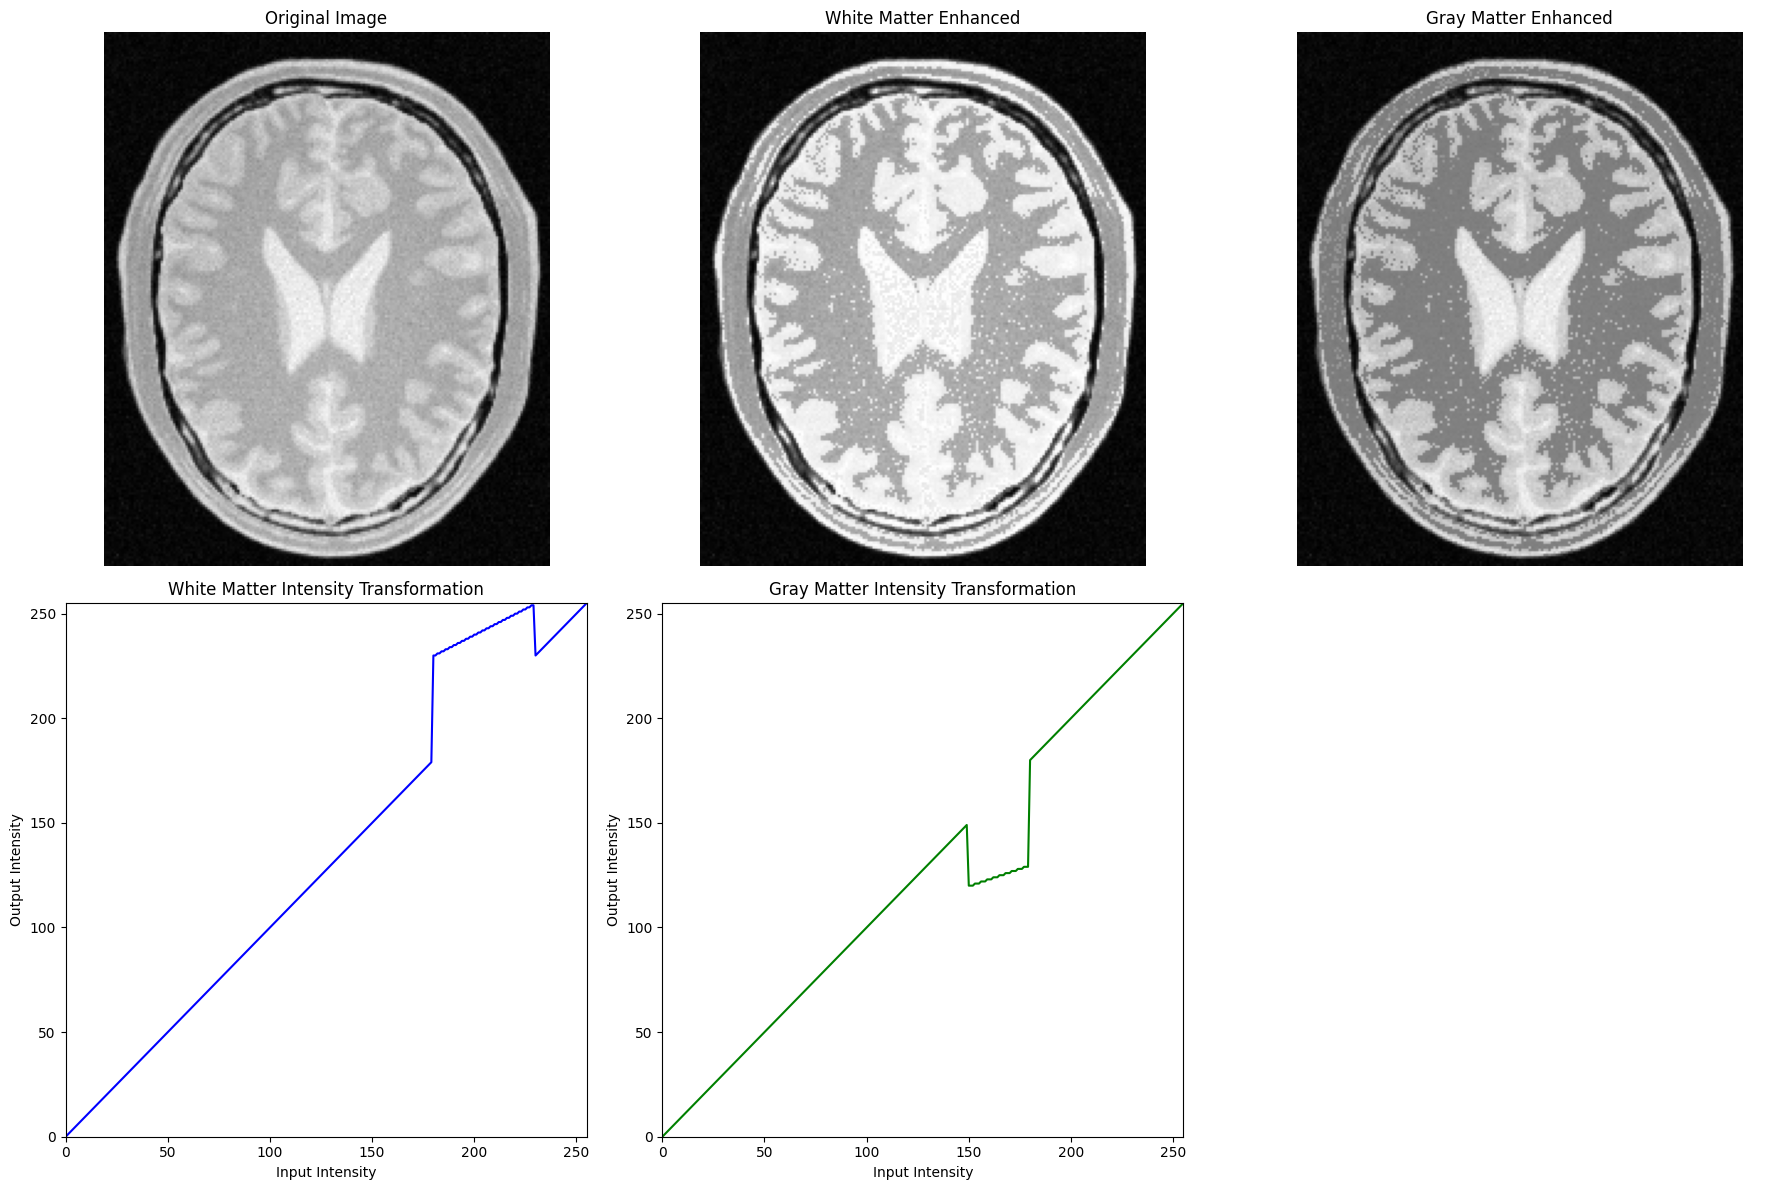

In [4]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the brain image
brain_img = cv.imread('a1images/brain_proton_density_slice.png', cv.IMREAD_GRAYSCALE)

# Define control points for white matter transformation
c_white_matter = np.array([(180, 180), (180, 230), (230, 255), (230, 230), (255, 255)])
x= 60+90
y = 120
z = 100+80

# Define control points for gray matter transformation
c_gray_matter = np.array([(x, x), (x, y), (z, 130), (z, z), (255, 255)])

# Function to create intensity transformation based on control points
def create_intensity_transform(c):
    t1 = np.linspace(0, c[0, 1], c[0, 0] + 1).astype('uint8')      
    t2 = np.linspace(c[0, 1], c[1, 1], c[1, 0] - c[0, 0] + 1).astype('uint8')  
    t3 = np.linspace(c[1, 1], c[2, 1], c[2, 0] - c[1, 0] + 1).astype('uint8')  
    t4 = np.linspace(c[2, 1], c[3, 1], c[3, 0] - c[2, 0] + 1).astype('uint8')  
    t5 = np.linspace(c[3, 1], c[4, 1], c[4, 0] - c[3, 0] + 1).astype('uint8')  
    
    # Concatenate the transformation arrays
    transform = np.concatenate((t1[:-1], t2[:-1], t3[:-1], t4[:-1], t5), axis=0)
    return transform

# Create intensity transformations
transform_white = create_intensity_transform(c_white_matter)
transform_gray = create_intensity_transform(c_gray_matter)

# Apply intensity windowing transformations
image_white_matter = cv.LUT(brain_img, transform_white)
image_gray_matter = cv.LUT(brain_img, transform_gray)

# Plot the original image, white matter enhanced, and gray matter enhanced images
fig, ax = plt.subplots(2, 3, figsize=(18, 12))

# Original image
ax[0, 0].imshow(brain_img, cmap='gray')
ax[0, 0].set_title('Original Image')
ax[0, 0].axis('off')

# White matter enhanced image
ax[0, 1].imshow(image_white_matter, cmap='gray')
ax[0, 1].set_title('White Matter Enhanced')
ax[0, 1].axis('off')

# Gray matter enhanced image
ax[0, 2].imshow(image_gray_matter, cmap='gray')
ax[0, 2].set_title('Gray Matter Enhanced')
ax[0, 2].axis('off')

# Plot intensity transformation for white matter
ax[1, 0].plot(transform_white, color='blue')
ax[1, 0].set_title('White Matter Intensity Transformation')
ax[1, 0].set_xlim(0, 255)
ax[1, 0].set_ylim(0, 255)
ax[1, 0].set_xlabel('Input Intensity')
ax[1, 0].set_ylabel('Output Intensity')

# Plot intensity transformation for gray matter
ax[1, 1].plot(transform_gray, color='green')
ax[1, 1].set_title('Gray Matter Intensity Transformation')
ax[1, 1].set_xlim(0, 255)
ax[1, 1].set_ylim(0, 255)
ax[1, 1].set_xlabel('Input Intensity')
ax[1, 1].set_ylabel('Output Intensity')

# Hide the last plot
ax[1, 2].axis('off')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

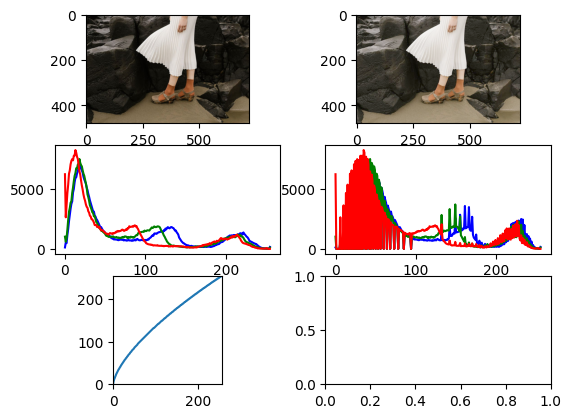

In [6]:
# Gamma and Histograms
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
img_orig = cv.imread(r'a1images\highlights_and_shadows.jpg', cv.IMREAD_COLOR)
gamma = 1.5
table = np.array([(i/255.0)**(1/gamma)*255.0 for i in np.arange(0,256)]).astype('uint8')
img_gamma = cv.LUT(img_orig, table)
img_orig = cv.cvtColor(img_orig, cv.COLOR_BGR2RGB)
img_gamma = cv.cvtColor(img_gamma, cv.COLOR_BGR2RGB)
f, axarr = plt.subplots(3,2)
axarr[0,0].imshow(img_orig)
axarr[0,1].imshow(img_gamma)

color = ('b', 'g', 'r')
for i, c in enumerate(color):
    hist_orig = cv.calcHist([img_orig], [i], None, [256], [0,256])
    axarr[1,0].plot(hist_orig, color = c)
    hist_gamma = cv.calcHist([img_gamma], [i], None, [256], [0,256])
    axarr[1,1].plot(hist_gamma, color = c)    
axarr[2,0].plot(table)
axarr[2,0].set_xlim(0,255)
axarr[2,0].set_ylim(0,255)
axarr[2,0].set_aspect('equal')

plt.show()

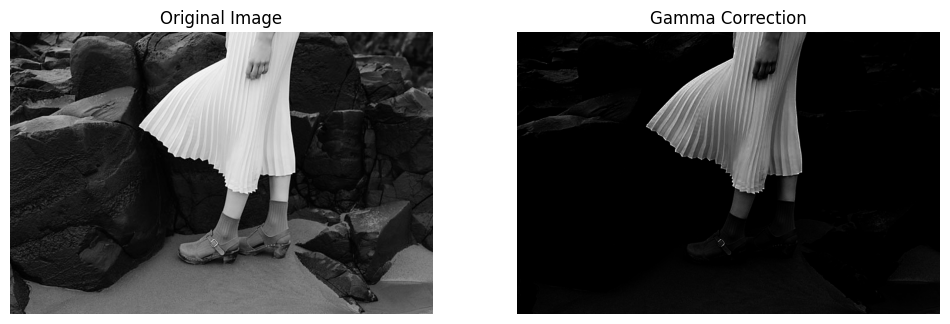

In [1]:
# Gamma Correction
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

gamma = 4
f = cv.imread(r'a1images\highlights_and_shadows.jpg', cv.IMREAD_GRAYSCALE)

t = np.array([(i/255.0)**(gamma)*255 for i in np.arange(0,256)]).astype(np.uint8)
g = cv.LUT(f, t)

fig, ax = plt.subplots(1, 2, figsize=(12, 8))
ax[0].imshow(f, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original Image')
ax[1].imshow(g, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Gamma Correction')
for a in ax:
    a.axis('off')
plt.show()

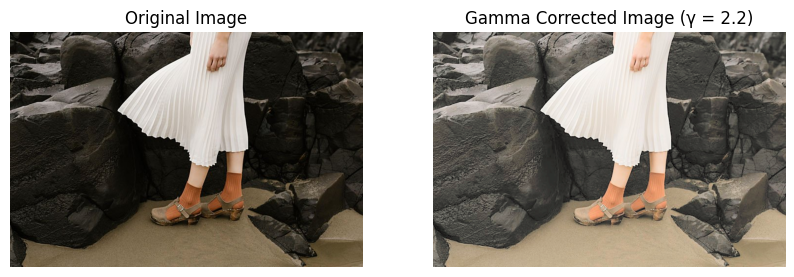

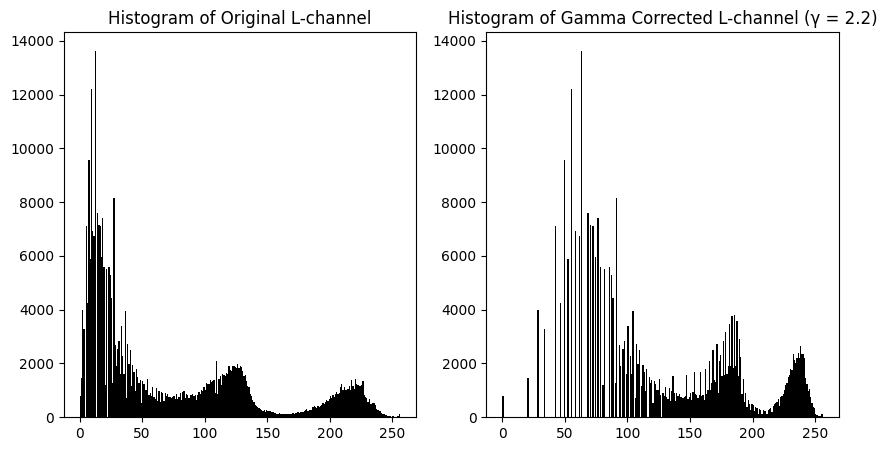

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread(r'a1images\highlights_and_shadows.jpg')

# Convert the image from BGR (OpenCV default) to LAB color space
lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

# Split the LAB image into L, A, and B channels
L, A, B = cv2.split(lab_image)

# Apply gamma correction to the L-channel
gamma = 2.2  # You can change the gamma value to see different results
L_corrected = np.array(255 * (L / 255) ** (1 / gamma), dtype='uint8')

# Merge the corrected L-channel back with A and B channels
lab_corrected = cv2.merge([L_corrected, A, B])

# Convert LAB back to BGR color space
image_corrected = cv2.cvtColor(lab_corrected, cv2.COLOR_LAB2BGR)

# Plot original and gamma corrected images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(image_corrected, cv2.COLOR_BGR2RGB))
plt.title(f'Gamma Corrected Image (γ = {gamma})')
plt.axis('off')

# Show histograms of the L-channel before and after correction
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(L.ravel(), 256, [0, 256], color='black')
plt.title('Histogram of Original L-channel')

plt.subplot(1, 2, 2)
plt.hist(L_corrected.ravel(), 256, [0, 256], color='black')
plt.title(f'Histogram of Gamma Corrected L-channel (γ = {gamma})')

plt.show()

C:\Users\Kiru\AppData\Local\Temp\ipykernel_14576\332255875.py:12: RuntimeWarning: overflow encountered in scalar subtract
  transformed_saturation[i, j] = min(x + a * 128 * np.exp(-(x - 128) ** 2 / (2 * sigma ** 2)), 255)
C:\Users\Kiru\AppData\Local\Temp\ipykernel_14576\332255875.py:12: RuntimeWarning: overflow encountered in scalar negative
  transformed_saturation[i, j] = min(x + a * 128 * np.exp(-(x - 128) ** 2 / (2 * sigma ** 2)), 255)


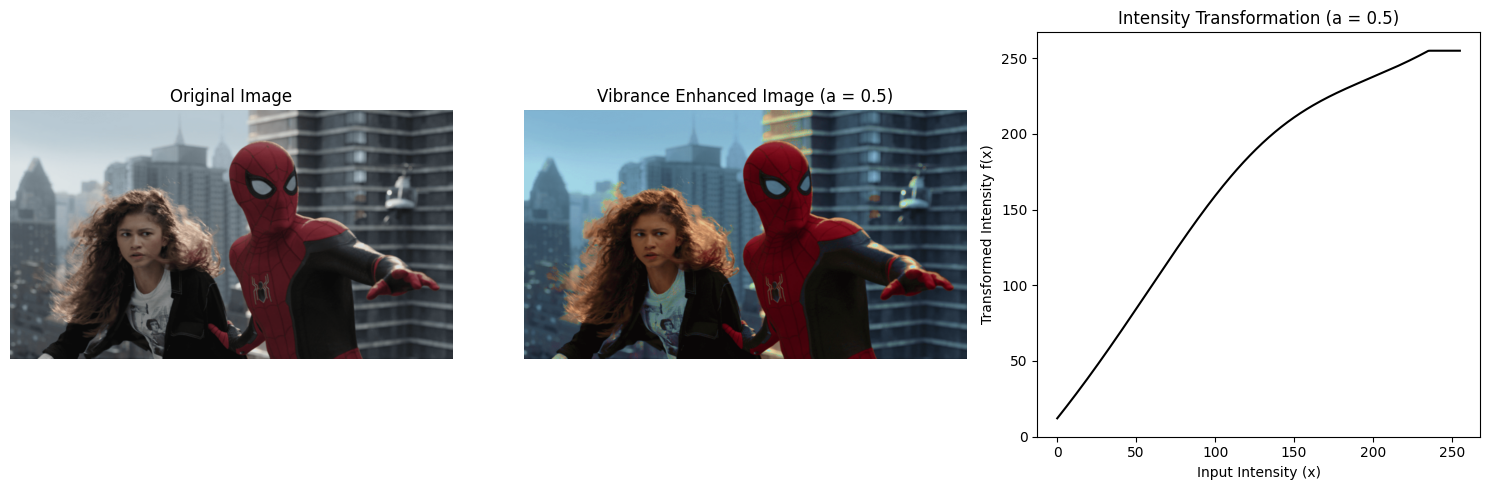

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to apply intensity transformation to saturation plane
def intensity_transformation(saturation, a=0.5, sigma=70):
    transformed_saturation = np.zeros_like(saturation, dtype=np.float32)
    
    for i in range(saturation.shape[0]):
        for j in range(saturation.shape[1]):
            x = saturation[i, j]
            transformed_saturation[i, j] = min(x + a * 128 * np.exp(-(x - 128) ** 2 / (2 * sigma ** 2)), 255)
    
    return np.uint8(transformed_saturation)

# Load the image
image = cv2.imread('a1images/spider.png')

# Convert the image from BGR to HSV color space
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Split into Hue, Saturation, and Value planes
hue, saturation, value = cv2.split(hsv_image)

# Apply intensity transformation to the saturation plane
a = 0.5  # You can modify 'a' to get visually pleasing output
saturation_transformed = intensity_transformation(saturation, a=a)

# Recombine the Hue, transformed Saturation, and Value planes
hsv_transformed = cv2.merge([hue, saturation_transformed, value])

# Convert the HSV image back to BGR color space
image_vibrance_enhanced = cv2.cvtColor(hsv_transformed, cv2.COLOR_HSV2BGR)

# Display the original and vibrance-enhanced images
plt.figure(figsize=(15, 5))

# Original image
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Vibrance-enhanced image
plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(image_vibrance_enhanced, cv2.COLOR_BGR2RGB))
plt.title(f'Vibrance Enhanced Image (a = {a})')
plt.axis('off')

# Display the intensity transformation
x_vals = np.arange(0, 256, 1)
y_vals = [min(x + a * 128 * np.exp(-(x - 128) ** 2 / (2 * 70 ** 2)), 255) for x in x_vals]

plt.subplot(1, 3, 3)
plt.plot(x_vals, y_vals, color='black')
plt.title(f'Intensity Transformation (a = {a})')
plt.xlabel('Input Intensity (x)')
plt.ylabel('Transformed Intensity f(x)')

plt.tight_layout()
plt.show()

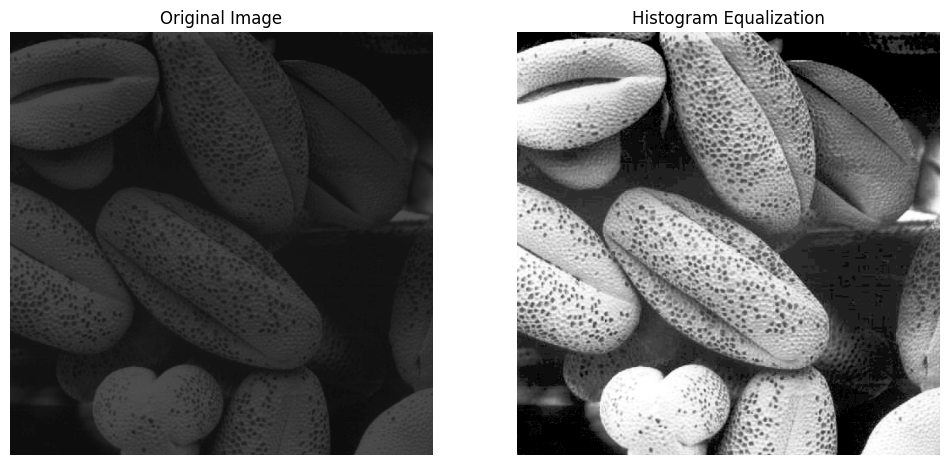

In [1]:
# Carry Our Histogram Equalization on the shells.tif Image
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

f = cv.imread('a1images/shells.tif', cv.IMREAD_GRAYSCALE)
g = cv.equalizeHist(f)
fig, ax = plt.subplots(1, 2, figsize=(12, 8))
ax[0].imshow(f, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original Image')
ax[0].axis('off')
ax[1].imshow(g, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Histogram Equalization')
ax[1].axis('off')
plt.show()

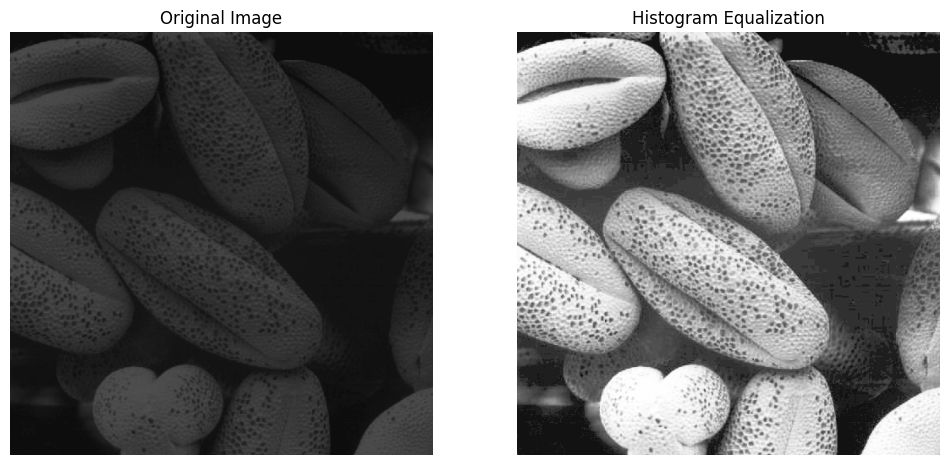

In [2]:
# Do the Same Using a Hand-Computed Intensity Transfromation
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

f = cv.imread('a1images/shells.tif', cv.IMREAD_GRAYSCALE)
M, N = f.shape
L = 256
t = np.zeros(256, dtype=np.uint8)
hist, bins = np.histogram(f.ravel(), 256, [0, 256])
cdf = hist.cumsum()
cdf_min = cdf.min()
cdf_max = cdf.max()
t = np.array([(L-1)/(M*N)*cdf[i] for i in range(256)], dtype=np.uint8)
g = t[f]
fig, ax = plt.subplots(1, 2, figsize=(12, 8))
ax[0].imshow(f, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original Image')
ax[0].axis('off')
ax[1].imshow(g, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Histogram Equalization')
ax[1].axis('off')
plt.show()

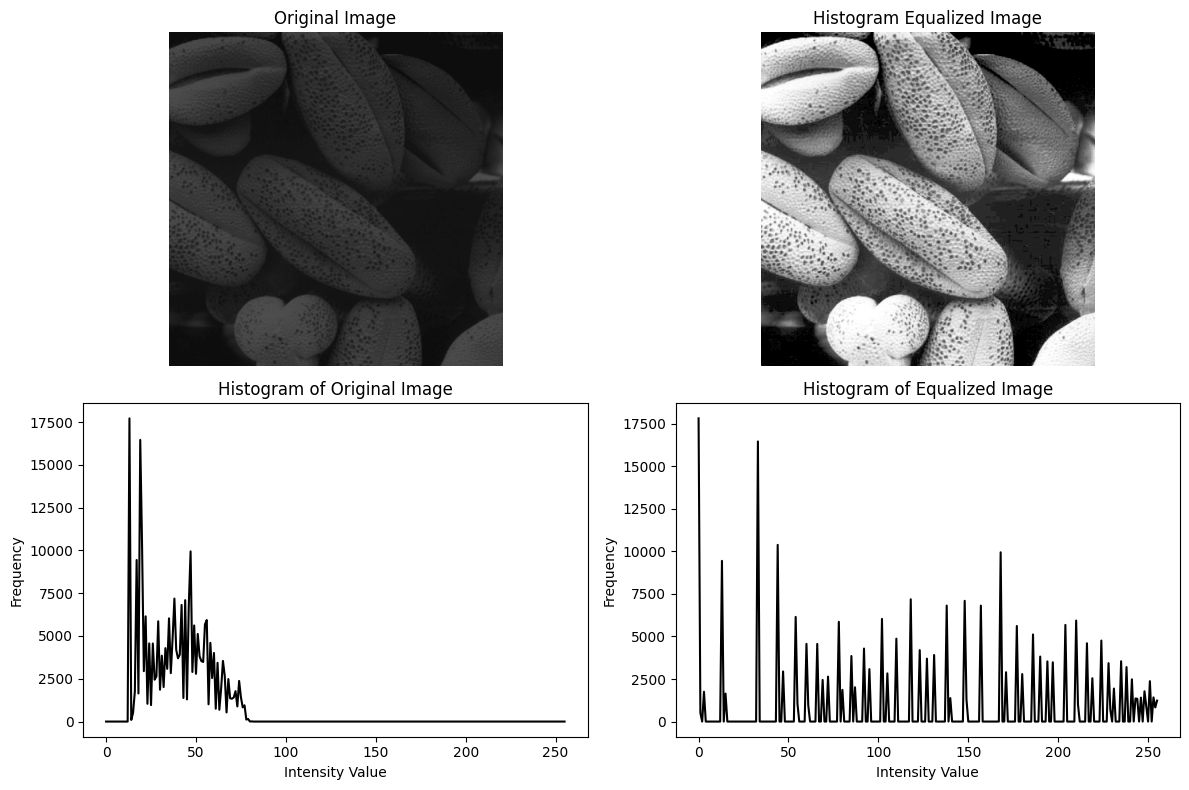

In [3]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the grayscale image
f = cv.imread('a1images/shells.tif', cv.IMREAD_GRAYSCALE)

# Perform histogram equalization using OpenCV
f_equalized = cv.equalizeHist(f)

# Compute histograms for original and equalized images
hist_orig = cv.calcHist([f], [0], None, [256], [0, 256])
hist_equalized = cv.calcHist([f_equalized], [0], None, [256], [0, 256])

# Plot original image, equalized image, and their histograms
fig, ax = plt.subplots(2, 2, figsize=(12, 8))

# Display the original image
ax[0, 0].imshow(f, cmap='gray', vmin=0, vmax=255)
ax[0, 0].set_title('Original Image')
ax[0, 0].axis('off')

# Display the histogram equalized image
ax[0, 1].imshow(f_equalized, cmap='gray', vmin=0, vmax=255)
ax[0, 1].set_title('Histogram Equalized Image')
ax[0, 1].axis('off')

# Plot the histogram of the original image
ax[1, 0].plot(hist_orig, color='black')
ax[1, 0].set_title('Histogram of Original Image')
ax[1, 0].set_xlabel('Intensity Value')
ax[1, 0].set_ylabel('Frequency')

# Plot the histogram of the equalized image
ax[1, 1].plot(hist_equalized, color='black')
ax[1, 1].set_title('Histogram of Equalized Image')
ax[1, 1].set_xlabel('Intensity Value')
ax[1, 1].set_ylabel('Frequency')

# Adjust the layout for better display
plt.tight_layout()
plt.show()

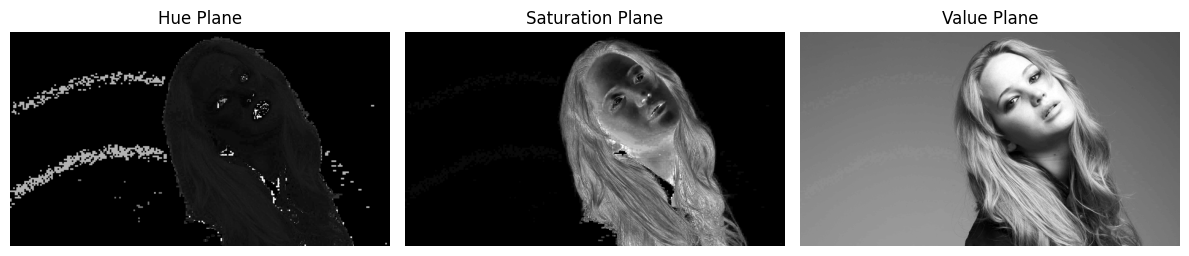

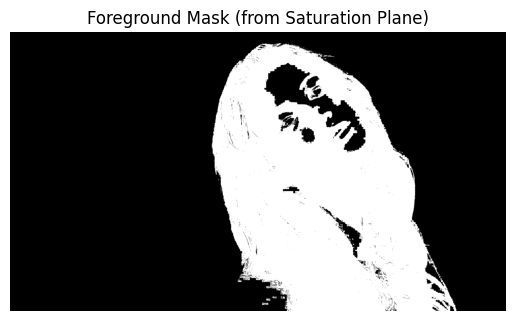

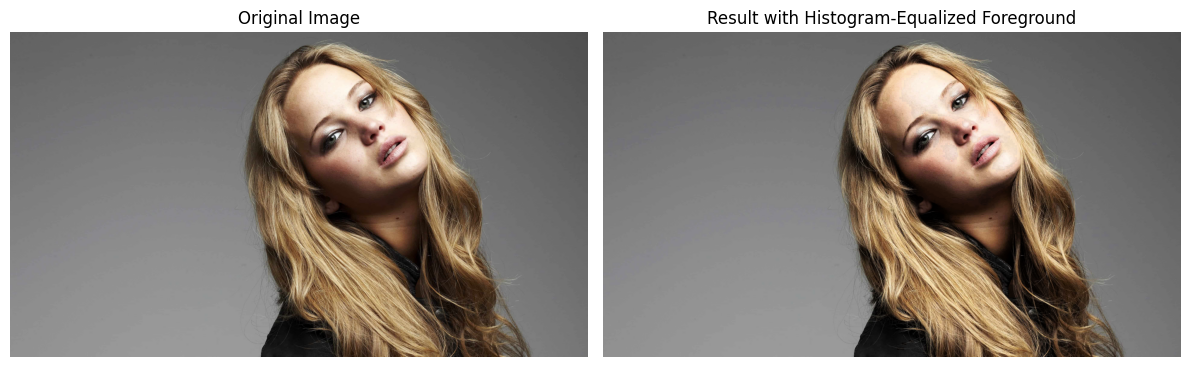

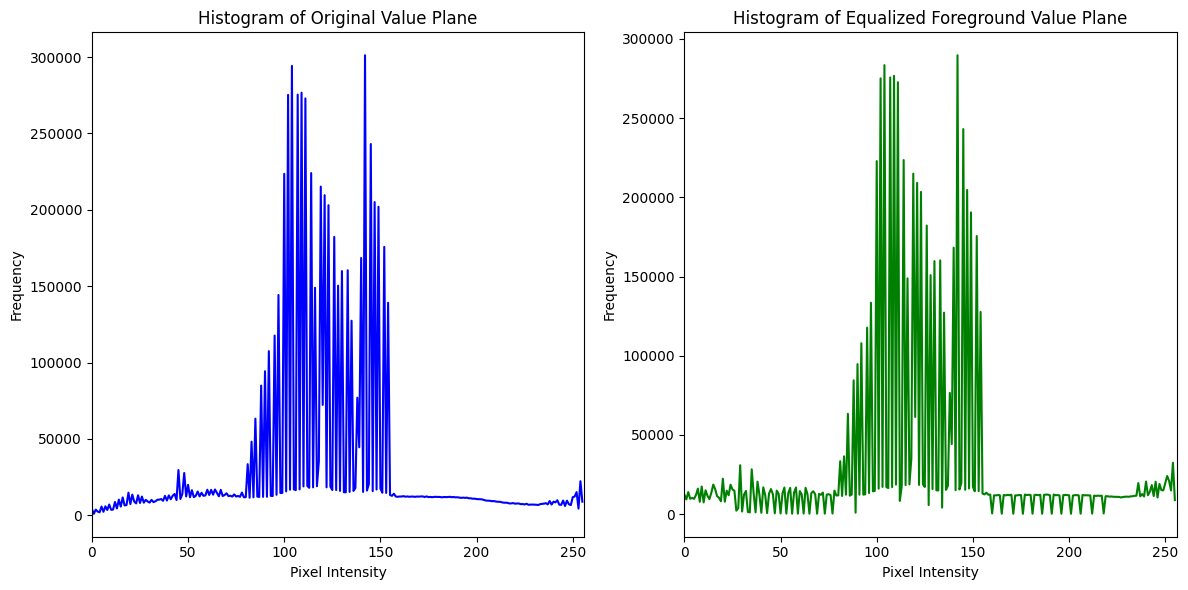

In [10]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Step (a): Open the image and convert to HSV, then split into H, S, and V planes
img = cv.imread('a1images/jeniffer.jpg')
hsv_img = cv.cvtColor(img, cv.COLOR_BGR2HSV)

# Split into hue, saturation, and value planes
hue, saturation, value = cv.split(hsv_img)

# Display H, S, and V planes
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
ax[0].imshow(hue, cmap='gray')
ax[0].set_title('Hue Plane')
ax[0].axis('off')

ax[1].imshow(saturation, cmap='gray')
ax[1].set_title('Saturation Plane')
ax[1].axis('off')

ax[2].imshow(value, cmap='gray')
ax[2].set_title('Value Plane')
ax[2].axis('off')

plt.tight_layout()
plt.show()

# Step (b): Threshold the Saturation plane to create a binary mask for the foreground
# Adjust threshold values as needed to properly isolate the foreground
_, mask = cv.threshold(saturation, 50, 255, cv.THRESH_BINARY)

# Display the mask
plt.imshow(mask, cmap='gray')
plt.title('Foreground Mask (from Saturation Plane)')
plt.axis('off')
plt.show()

# Step (c): Extract the foreground using cv.bitwise_and and compute the histogram
foreground = cv.bitwise_and(value, value, mask=mask)

# Compute histogram for the foreground
hist_foreground = cv.calcHist([foreground], [0], mask, [256], [0, 256])

# Step (d): Obtain the cumulative sum of the histogram
cdf = np.cumsum(hist_foreground)

# Normalize the CDF
cdf_min = cdf[cdf > 0].min()
cdf = (cdf - cdf_min) / (cdf.max() - cdf_min) * 255
cdf = cdf.astype(np.uint8)

# Step (e): Apply histogram equalization to the foreground
foreground_equalized = cdf[foreground]

# Step (f): Extract the background
background = cv.bitwise_and(value, value, mask=cv.bitwise_not(mask))

# Add the histogram-equalized foreground back to the background
final_value = cv.add(foreground_equalized, background)

# Recombine the H, S, and equalized V planes to get the final image
final_hsv = cv.merge([hue, saturation, final_value])
final_img = cv.cvtColor(final_hsv, cv.COLOR_HSV2BGR)

# Display the original image and the final result
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(cv.cvtColor(final_img, cv.COLOR_BGR2RGB))
ax[1].set_title('Result with Histogram-Equalized Foreground')
ax[1].axis('off')

plt.tight_layout()
plt.show()

# Step (g): Compute histograms of original value plane and equalized value plane
hist_original = cv.calcHist([value], [0], None, [256], [0, 256])
hist_equalized = cv.calcHist([final_value], [0], None, [256], [0, 256])

# Plot the histograms
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].plot(hist_original, color='blue')
ax[0].set_title('Histogram of Original Value Plane')
ax[0].set_xlim([0, 256])
ax[0].set_xlabel('Pixel Intensity')
ax[0].set_ylabel('Frequency')

ax[1].plot(hist_equalized, color='green')
ax[1].set_title('Histogram of Equalized Foreground Value Plane')
ax[1].set_xlim([0, 256])
ax[1].set_xlabel('Pixel Intensity')
ax[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


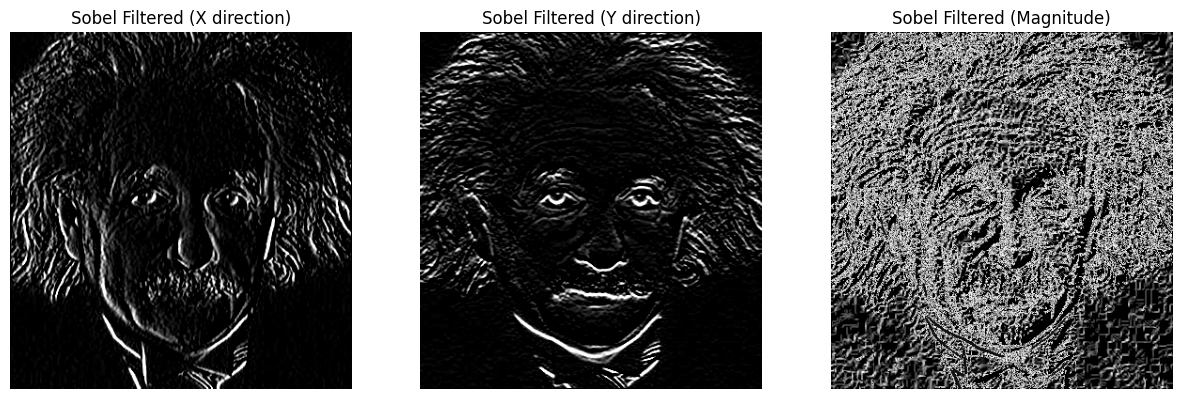

In [4]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Read image
img = cv.imread('a1images/einstein.png', cv.IMREAD_GRAYSCALE)

# Sobel kernel for x direction
sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])

# Sobel kernel for y direction
sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

# Apply Sobel filter in x direction using filter2D
sobel_filtered_x = cv.filter2D(img, -1, sobel_x)

# Apply Sobel filter in y direction using filter2D
sobel_filtered_y = cv.filter2D(img, -1, sobel_y)

# Magnitude of Sobel filter (gradient magnitude)
sobel_filtered = np.sqrt(sobel_filtered_x**2 + sobel_filtered_y**2)

# Plot results
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(sobel_filtered_x, cmap='gray')
ax[0].set_title('Sobel Filtered (X direction)')
ax[0].axis('off')

ax[1].imshow(sobel_filtered_y, cmap='gray')
ax[1].set_title('Sobel Filtered (Y direction)')
ax[1].axis('off')

ax[2].imshow(sobel_filtered, cmap='gray')
ax[2].set_title('Sobel Filtered (Magnitude)')
ax[2].axis('off')

plt.show()

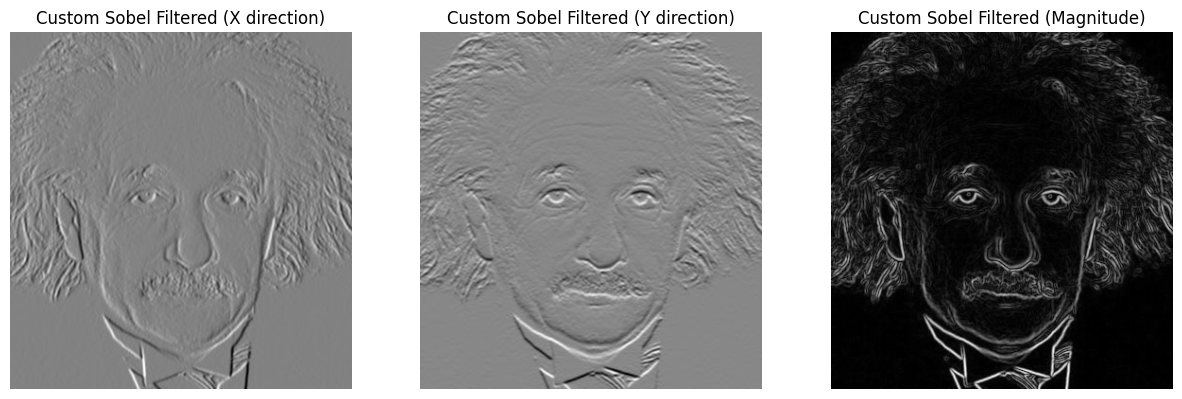

In [5]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Custom convolution function
def apply_convolution(img, kernel):
    M, N = img.shape
    k, l = kernel.shape
    output = np.zeros((M-k+1, N-l+1))

    # Convolution operation
    for i in range(M - k + 1):
        for j in range(N - l + 1):
            output[i, j] = np.sum(img[i:i+k, j:j+l] * kernel)
    
    return output

# Read image
img = cv.imread('a1images/einstein.png', cv.IMREAD_GRAYSCALE)

# Apply custom Sobel filter using the convolution function
sobel_filtered_x_custom = apply_convolution(img, sobel_x)
sobel_filtered_y_custom = apply_convolution(img, sobel_y)

# Magnitude of Sobel filter (custom)
sobel_filtered_custom = np.sqrt(sobel_filtered_x_custom**2 + sobel_filtered_y_custom**2)

# Plot results
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(sobel_filtered_x_custom, cmap='gray')
ax[0].set_title('Custom Sobel Filtered (X direction)')
ax[0].axis('off')

ax[1].imshow(sobel_filtered_y_custom, cmap='gray')
ax[1].set_title('Custom Sobel Filtered (Y direction)')
ax[1].axis('off')

ax[2].imshow(sobel_filtered_custom, cmap='gray')
ax[2].set_title('Custom Sobel Filtered (Magnitude)')
ax[2].axis('off')

plt.show()

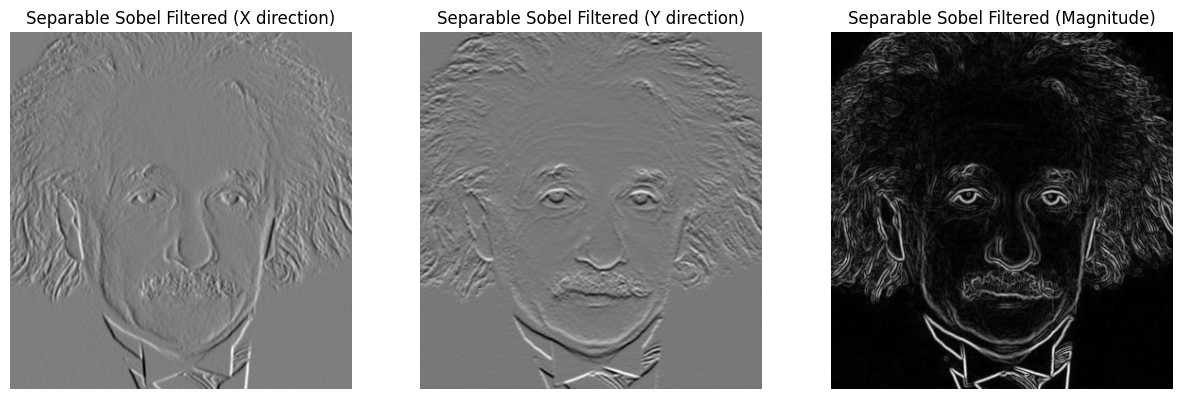

In [6]:
# Separable Sobel filters
vertical_filter = np.array([[1], [2], [1]])  # Vertical filter
horizontal_filter = np.array([[1, 0, -1]])  # Horizontal filter

# Apply the separable filters in both x and y directions
filtered_x = apply_convolution(img, vertical_filter)
filtered_x = apply_convolution(filtered_x, horizontal_filter)

filtered_y = apply_convolution(img, horizontal_filter.T)
filtered_y = apply_convolution(filtered_y, vertical_filter.T)

# Magnitude of the Sobel filter
sobel_separable_magnitude = np.sqrt(filtered_x**2 + filtered_y**2)

# Plot results
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(filtered_x, cmap='gray')
ax[0].set_title('Separable Sobel Filtered (X direction)')
ax[0].axis('off')

ax[1].imshow(filtered_y, cmap='gray')
ax[1].set_title('Separable Sobel Filtered (Y direction)')
ax[1].axis('off')

ax[2].imshow(sobel_separable_magnitude, cmap='gray')
ax[2].set_title('Separable Sobel Filtered (Magnitude)')
ax[2].axis('off')

plt.show()

Normalized SSD (Nearest Neighbor): 26.44607162475586
Normalized SSD (Bilinear): 94.941650390625


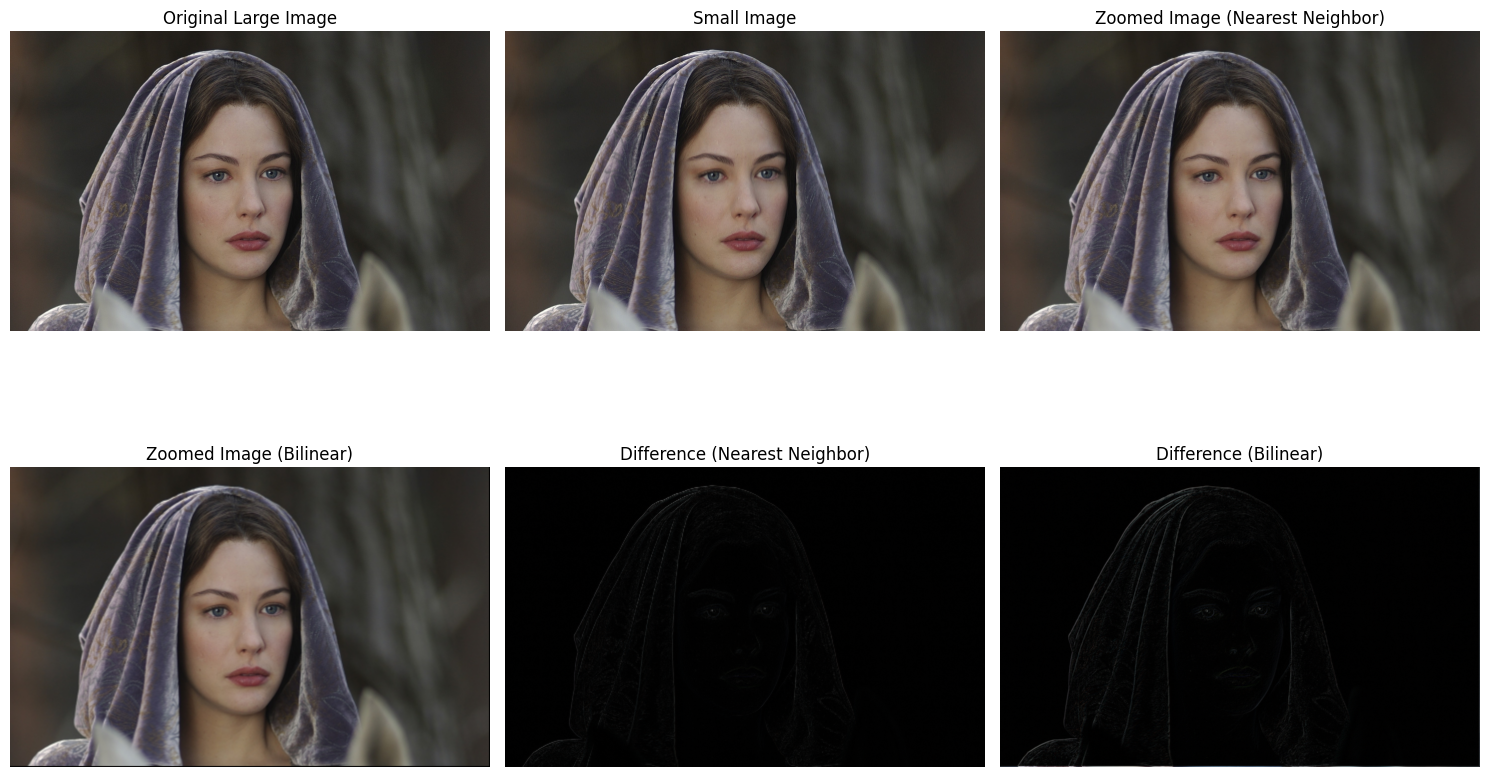

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def nearest_neighbor_interpolation(image, scale_factor):
    original_height, original_width = image.shape[:2]
    new_height, new_width = int(original_height * scale_factor), int(original_width * scale_factor)
    
    # Create an empty array for the zoomed image
    zoomed_image = np.zeros((new_height, new_width, image.shape[2]), dtype=image.dtype) if len(image.shape) == 3 else np.zeros((new_height, new_width), dtype=image.dtype)
    
    # Perform nearest-neighbor interpolation
    for i in range(new_height):
        for j in range(new_width):
            x = min(int(i / scale_factor), original_height - 1)
            y = min(int(j / scale_factor), original_width - 1)
            zoomed_image[i, j] = image[x, y]
    
    return zoomed_image

def bilinear_interpolation(image, scale_factor):
    original_height, original_width = image.shape[:2]
    new_height, new_width = int(original_height * scale_factor), int(original_width * scale_factor)
    
    # Create an empty array for the zoomed image
    zoomed_image = np.zeros((new_height, new_width, image.shape[2]), dtype=image.dtype) if len(image.shape) == 3 else np.zeros((new_height, new_width), dtype=image.dtype)
    
    for i in range(new_height):
        for j in range(new_width):
            x = i / scale_factor
            y = j / scale_factor
            
            x1 = int(np.floor(x))
            y1 = int(np.floor(y))
            x2 = min(x1 + 1, original_height - 1)
            y2 = min(y1 + 1, original_width - 1)
            
            r1 = (x2 - x) * image[x1, y1] + (x - x1) * image[x2, y1]
            r2 = (x2 - x) * image[x1, y2] + (x - x1) * image[x2, y2]
            zoomed_image[i, j] = (y2 - y) * r1 + (y - y1) * r2
    
    return zoomed_image

def compute_normalized_ssd(image1, image2):
    # Ensure both images are the same shape
    if image1.shape != image2.shape:
        raise ValueError("Images must be the same dimensions for SSD calculation.")
    
    # Compute SSD
    ssd = np.sum((image1.astype(np.float32) - image2.astype(np.float32)) ** 2)
    
    # Normalize by dividing by the number of pixels
    normalized_ssd = ssd / image1.size
    return normalized_ssd

# Load images
original_image_large = cv2.imread('a1images/a1q5images/im02.png')  
small_image = cv2.imread('a1images/a1q5images/im02small.png')           

# Zoom by a factor of 4 using nearest-neighbor and bilinear interpolation
zoom_factor = 4.0
zoomed_image_nearest = nearest_neighbor_interpolation(small_image, zoom_factor)
zoomed_image_bilinear = bilinear_interpolation(small_image, zoom_factor)

# Compute normalized SSD for both zoomed images compared to the original
ssd_nearest = compute_normalized_ssd(original_image_large, zoomed_image_nearest)
ssd_bilinear = compute_normalized_ssd(original_image_large, zoomed_image_bilinear)

# Print SSD results
print(f"Normalized SSD (Nearest Neighbor): {ssd_nearest}")
print(f"Normalized SSD (Bilinear): {ssd_bilinear}")

# Display original, zoomed, and difference images
fig, ax = plt.subplots(2, 3, figsize=(15, 10))

# Display Original Large Image
ax[0, 0].imshow(cv2.cvtColor(original_image_large, cv2.COLOR_BGR2RGB))
ax[0, 0].set_title('Original Large Image')
ax[0, 0].axis('off')

# Display Small Image (Zoomed)
ax[0, 1].imshow(cv2.cvtColor(small_image, cv2.COLOR_BGR2RGB))
ax[0, 1].set_title('Small Image')
ax[0, 1].axis('off')

# Display Zoomed Image (Nearest Neighbor)
ax[0, 2].imshow(cv2.cvtColor(zoomed_image_nearest, cv2.COLOR_BGR2RGB))
ax[0, 2].set_title('Zoomed Image (Nearest Neighbor)')
ax[0, 2].axis('off')

# Display Zoomed Image (Bilinear)
ax[1, 0].imshow(cv2.cvtColor(zoomed_image_bilinear, cv2.COLOR_BGR2RGB))
ax[1, 0].set_title('Zoomed Image (Bilinear)')
ax[1, 0].axis('off')

# Show Difference between Original and Nearest Neighbor Zoom
difference_nearest = cv2.absdiff(original_image_large, zoomed_image_nearest)
ax[1, 1].imshow(difference_nearest)
ax[1, 1].set_title('Difference (Nearest Neighbor)')
ax[1, 1].axis('off')

# Show Difference between Original and Bilinear Zoom
difference_bilinear = cv2.absdiff(original_image_large, zoomed_image_bilinear)
ax[1, 2].imshow(difference_bilinear)
ax[1, 2].set_title('Difference (Bilinear)')
ax[1, 2].axis('off')

plt.tight_layout()
plt.show()

Normalized SSD (Nearest Neighbor): 26.446071759259258
Normalized SSD (Bilinear): 18.34591087962963


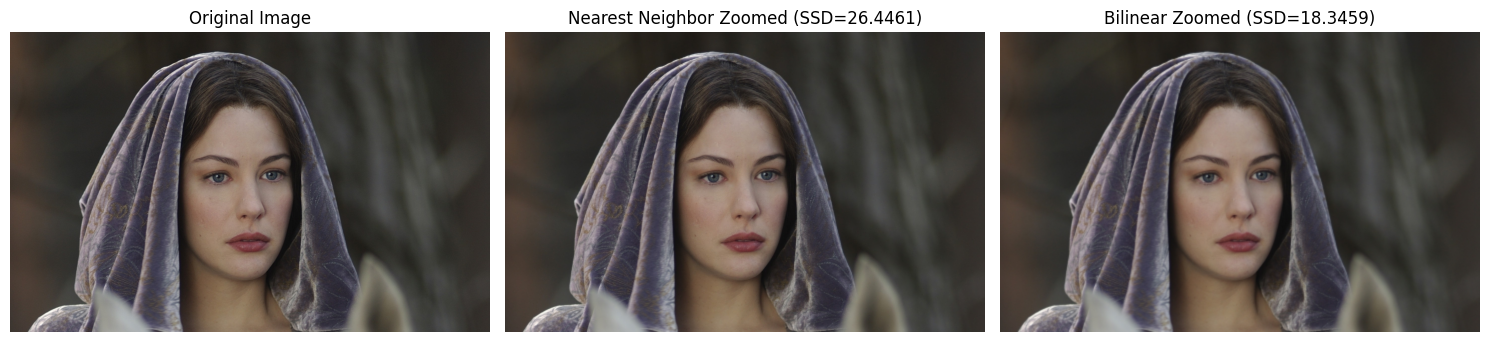

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to zoom the image using nearest-neighbor or bilinear interpolation
def zoom_image(image, scale, interpolation):
    height, width = image.shape[:2]
    new_size = (int(width * scale), int(height * scale))
    return cv2.resize(image, new_size, interpolation=interpolation)

# Function to compute normalized SSD between two images
def compute_normalized_ssd(img1, img2, bypass_size_error=True):
    if not bypass_size_error:
        # Ensure images are of the same size
        assert img1.shape == img2.shape, "Images must be the same shape for SSD computation."
    else: 
        # Crop the larger image to match the smaller image
        min_height = min(img1.shape[0], img2.shape[0])
        min_width = min(img1.shape[1], img2.shape[1])

        img1 = img1[:min_height, :min_width]
        img2 = img2[:min_height, :min_width]
    
    # Compute the sum of squared differences
    ssd = np.sum((img1.astype("float32") - img2.astype("float32")) ** 2)
    
    # Normalize by the number of pixels
    norm_ssd = ssd / np.prod(img1.shape)
    
    return norm_ssd

# Function to display images side-by-side
def display_images(original, nearest, bilinear, titles):
    plt.figure(figsize=(15, 10))

    # Original image
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    plt.title(titles[0])
    plt.axis('off')

    # Nearest-neighbor zoomed image
    plt.subplot(1, 3, 2)
    plt.imshow(cv2.cvtColor(nearest, cv2.COLOR_BGR2RGB))
    plt.title(titles[1])
    plt.axis('off')

    # Bilinear zoomed image
    plt.subplot(1, 3, 3)
    plt.imshow(cv2.cvtColor(bilinear, cv2.COLOR_BGR2RGB))
    plt.title(titles[2])
    plt.axis('off')

    plt.tight_layout()
    plt.show()

# Load the original and zoomed-out images
original_large = cv2.imread('a1images/a1q5images/im02.png')  # Replace with your large image path
small_image = cv2.imread('a1images/a1q5images/im02small.png')     # Replace with your small image path

# Scale factor
scale_factor = 4  # Zoom in by a factor of 4

# Zoom using nearest-neighbor interpolation
zoomed_nn = zoom_image(small_image, scale_factor, cv2.INTER_NEAREST)

# Zoom using bilinear interpolation
zoomed_bilinear = zoom_image(small_image, scale_factor, cv2.INTER_LINEAR)

# Compute normalized SSD for nearest-neighbor zoomed image
ssd_nn = compute_normalized_ssd(original_large, zoomed_nn, bypass_size_error=True)

# Compute normalized SSD for bilinear zoomed image
ssd_bilinear = compute_normalized_ssd(original_large, zoomed_bilinear, bypass_size_error=True)

# Print out SSD values
print(f"Normalized SSD (Nearest Neighbor): {ssd_nn}")
print(f"Normalized SSD (Bilinear): {ssd_bilinear}")

# Display the images
titles = ["Original Image", f"Nearest Neighbor Zoomed (SSD={ssd_nn:.4f})", f"Bilinear Zoomed (SSD={ssd_bilinear:.4f})"]
display_images(original_large, zoomed_nn, zoomed_bilinear, titles)
